In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA Dimensional Reduction
from sklearn import metrics
import warnings
from keras.models import Sequential
from xgboost import XGBRegressor
from keras.layers.core import Dense,Activation
import tensorflow
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('listings.csv',index_col=0)#Load data, use the first column as the default index
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [5]:
df.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.845200e+04,0.0,28452.000000,28452.000000,28452.000000,28452.000000,28452.000000,17294.000000,28452.000000,28452.000000
mean,1.442821e+08,NaN,39.983225,116.442000,611.203325,2.729685,7.103156,1.319757,12.818290,220.342120
std,7.057051e+07,NaN,0.186984,0.204796,1623.535077,17.920932,16.815067,1.581243,29.261321,138.430677
min,1.928750e+05,NaN,39.455810,115.473390,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.708958e+07,NaN,39.897330,116.355283,235.000000,1.000000,0.000000,0.290000,2.000000,87.000000
50%,1.525464e+08,NaN,39.930905,116.434665,389.000000,1.000000,1.000000,0.800000,5.000000,209.000000
75%,2.061464e+08,NaN,39.990470,116.491122,577.000000,1.000000,6.000000,1.750000,11.000000,361.000000
max,2.563498e+08,NaN,40.949660,117.495270,68983.000000,1125.000000,322.000000,20.000000,222.000000,365.000000


In [6]:
# view null information after data cleaning
df.isnull().sum()

name                                  1
host_id                               0
host_name                             0
neighbourhood_group               28452
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11158
reviews_per_month                 11158
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Fill the number_of_reviews empty value as the mean value
df.number_of_reviews.fillna(df.number_of_reviews.mean(),inplace=True)
df.isnull().sum()

name                                  1
host_id                               0
host_name                             0
neighbourhood_group               28452
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11158
reviews_per_month                 11158
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Create subdataset
subsets=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

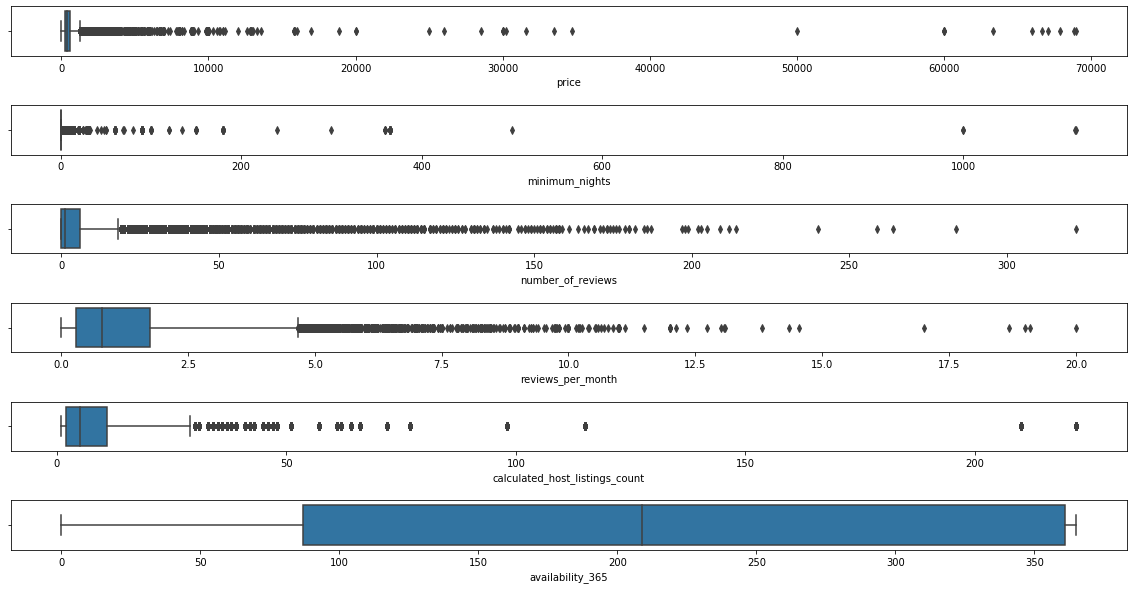

In [9]:
# We useBox chart to get the general distribution of data and view outlier information
fig,axes=plt.subplots(len(subsets),1,figsize=(20,10))
plt.subplots_adjust(hspace=1)
for i,subset in enumerate(subsets):
    sns.boxplot(df[subset],ax=axes[i],whis=2,orient='h')

In [10]:
# Exploratory data analysis
def get_con(df):
    subsets=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
    data={}
    for i in subsets:
        data.setdefault(i,[])
        data[i].append(df[i].skew())
        data[i].append(df[i].kurt())
        data[i].append(df[i].mean())
        data[i].append(df[i].std())
        data[i].append(df[i].std()/df[i].mean())
        data[i].append(df[i].max()-df[i].min())
        data[i].append(df[i].quantile(0.75)-df[i].quantile(0.25))
        data[i].append(df[i].median())
    data_df=pd.DataFrame(data,index=['偏度','峰度','均值','标准差','变异系数','极差','四分位距','中位数'],columns=subsets)
    return data_df.T

In [11]:
df2=get_con(df)
df2

,偏度,峰度,均值,标准差,变异系数,极差,四分位距,中位数
price,26.352220,953.491644,611.203325,1623.535077,2.656293,68983.00,342.00,389.0
minimum_nights,37.217023,1903.434466,2.729685,17.920932,6.565201,1124.00,0.00,1.0
number_of_reviews,5.298352,41.760423,7.103156,16.815067,2.367267,322.00,6.00,1.0
reviews_per_month,2.695109,11.731862,1.319757,1.581243,1.198132,19.99,1.46,0.8
calculated_host_listings_count,5.495265,33.725189,12.818290,29.261321,2.282779,221.00,9.00,5.0
availability_365,-0.252307,-1.568170,220.342120,138.430677,0.628253,365.00,274.00,209.0


In [16]:
df['last_review_to_date']=pd.to_datetime(df.last_review)-pd.datetime.today()# On each listing, get the number of days since the last comment
def get_last_review_top10(df):
    # Obtain the short-term rental information of the top 10 distances from the last comment in each district (Unoccupied for a long time, or no evaluation).They need attention.
    result=[]
    groups=df.groupby('neighbourhood')
    for x,group in groups:
        result.append(group.sort_values(by='last_review_to_date')[:10])
    result=pd.concat(result)
    return result
last_review_top10_by_neighbourhood=get_last_review_top10(df)
last_review_top10_by_neighbourhood.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_to_date
id,,,,,,,,,,,,,,,,
317195,"Sweet Apartment, Embassy Area",1455726,Fiona,NaN,东城区,39.93946,116.43545,Entire home/apt,550,1,3,2014-09-06,0.04,7,353,-2150 days +11:16:31.704996
8541323,Center of Beijing:Old Courtyard,19368094,Ruby,NaN,东城区,39.89245,116.42168,Private room,2100,1,1,2015-10-06,0.02,1,364,-1755 days +11:16:31.704996
7464911,wonderful room in great location,39101420,Virginia,NaN,东城区,39.93523,116.43242,Private room,188,1,4,2015-11-02,0.09,1,0,-1728 days +11:16:31.704996
9378708,Beijing garden house 2BD 钱粮胡同雅致四合院,5108896,Quinty,NaN,东城区,39.92792,116.41325,Entire home/apt,3201,30,1,2015-11-21,0.02,1,363,-1709 days +11:16:31.704996
7228136,"2环内老北京家属楼大开间,安静舒适,近龙潭湖公园,天坛,CBD｡",29355887,Nikki,NaN,东城区,39.88622,116.43454,Shared room,141,5,4,2016-01-11,0.09,1,365,-1658 days +11:16:31.704996


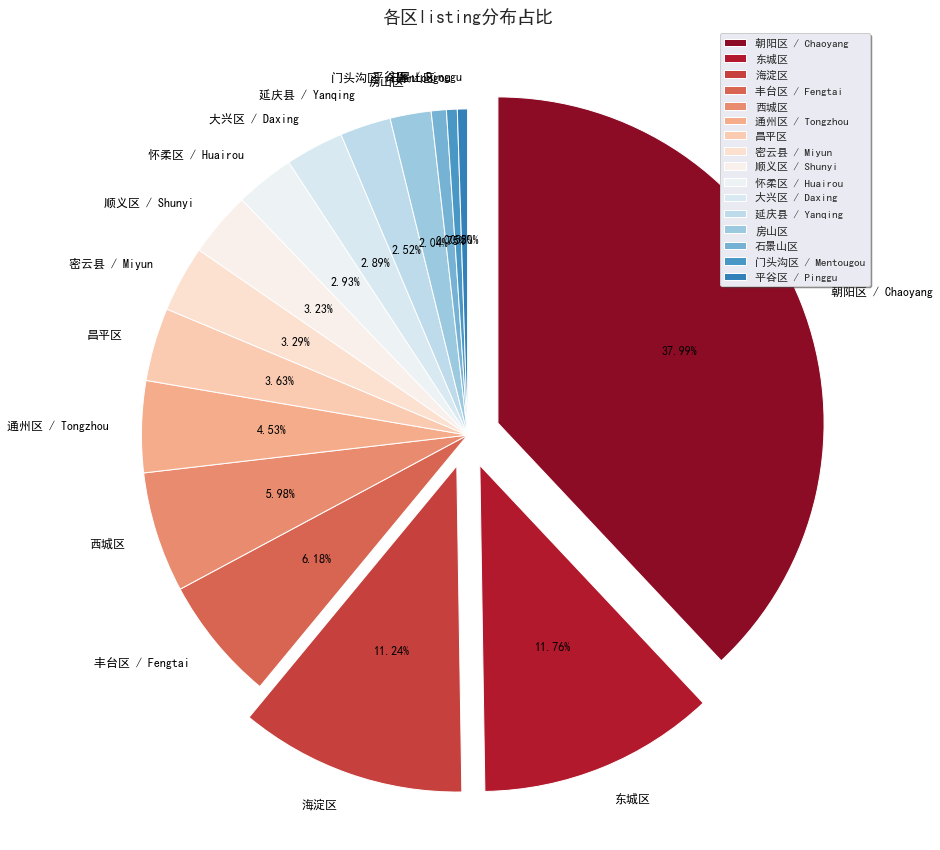

In [17]:
# Draw a pie chart to view the distribution of listings
lis_dis=df.neighbourhood.value_counts()
labels=lis_dis.index
sns.set(font_scale=1.5)
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(15,15))
plt.title('各区listing分布占比',fontdict={'fontsize':18})
plt.pie(lis_dis,labels=labels,autopct='%.2f%%',explode=[0.1 if i in ['东城区','朝阳区 / Chaoyang','海淀区'] else 0 for i in labels],startangle=90,counterclock=False,textprops={'fontsize':12,'color':'black'},colors=sns.color_palette('RdBu',n_colors=18)) #东城区，朝阳区，海淀区占比较高，使用explode突出显示
plt.legend(loc='best',shadow=True,fontsize=11)
# In terms of listing distribution, Chaoyang, Haidian, and Dongcheng district account for more than 60%. Other districts need to be developed.

In [18]:
import jieba
from wordcloud import WordCloud

Text(0.5, 1, 'Correlation among features')

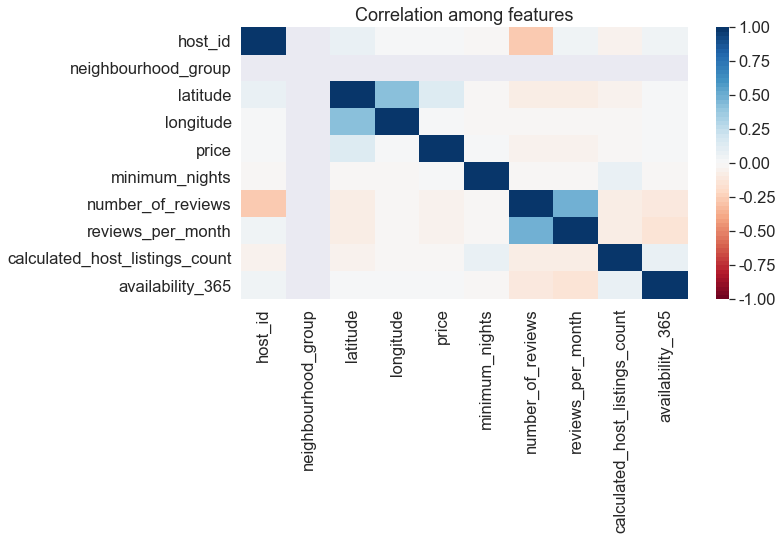

In [19]:
# Research on the common features of listing with a lot of reviews, including name, minimum number of days to live, time available for rent in a year, etc; using a comparative analysis method to compare with those with fewer reviews.
# Draw a heat map based on the correlation and roughly extract data features
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=64))
plt.title('Correlation among features')

In [20]:
feature=['names','minimum_nights','price','room_type']
label=['number_of_reviews']

In [21]:
def get_review_tb(df,num):
    '''Get the number of top/bottom comments in each district. According to the 'num' parameter, num is positive for top and negative for bottom'''
    result=[]
    groups=df.groupby('neighbourhood')
    for x,group in groups:
        if num>0:
            result.append(group.sort_values(by='number_of_reviews',ascending=False)[:num])
        if num<0:
            result.append(group.sort_values(by='number_of_reviews',ascending=False)[num:])
    result=pd.concat(result)
    return result

In [22]:
# Get the listing information of the top 10 comments in each district
reviews_top50=get_review_tb(df,10) 
# Get the listing information of bottom10 comments in each district
reviews_bottom50=get_review_tb(df,-10) 

In [25]:
def get_words(df):
    # Use jieba to split the house name to obtain high-frequency vocabulary
    s=[]
    wordsdic={}
    with open('stopwords.txt',encoding='utf8') as f:#Filter vocabulary based on stop words
        result=f.read().split()
    for i in df:
        words=jieba.lcut(i)
        word=[x for x in words if x not in result]
        s.extend(word)
    for word in s:
        wordsdic.setdefault(word,0)
        wordsdic[word]+=1
    return wordsdic
top_words=get_words(reviews_top50.name.astype('str'))
bottom_words=get_words(reviews_bottom50.name.astype('str'))
top_words_df=pd.Series(top_words).sort_values(ascending=False)[1:21]# Converted to Series format, aspect drawing visualization
bottom_words_df=pd.Series(bottom_words).sort_values(ascending=False)[1:21]# Starting from 1; to filter null values
print(bottom_words_df.head())

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\langbo\AppData\Local\Temp\jieba.cache
Loading model cost 2.604 seconds.
Prefix dict has been built successfully.


,     76
/     35
北京    29
地铁    27
､     24
dtype: int64


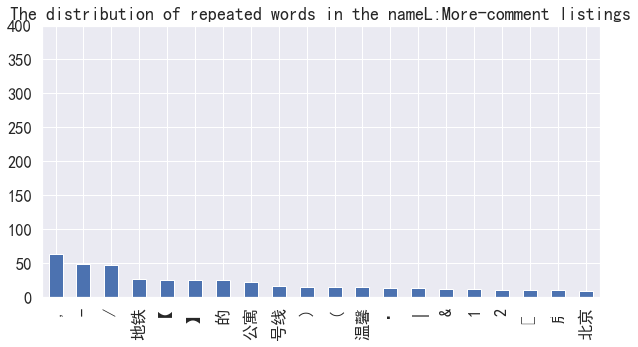

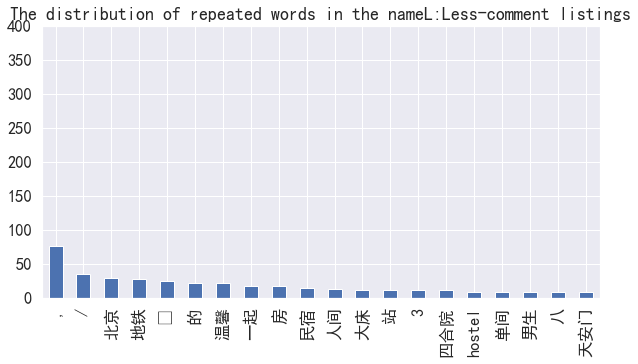

In [28]:
plt.figure(figsize=(10,5))
plt.title('The distribution of repeated words in the nameL:More-comment listings')
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False #Set the coefficient and display it in Chinese to solve the problem that the axis does not display Chinese characters or garbled characters
top_words_df.plot(kind='bar',ylim=[0,400])

plt.figure(figsize=(10,5))
plt.title('The distribution of repeated words in the nameL:Less-comment listings')
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
bottom_words_df.plot(kind='bar',ylim=[0,400])

We found that in the description, whether it is a large number of comments or a small number of comments, most of the vocabulary is concentrated in such words as subway, warm, and Beijing.   
 
The number of comments is not very relevant to the house description, or the number of comments received by the house is related to the house. Listing time is related. There is not much relevance in view of the description vocabulary.

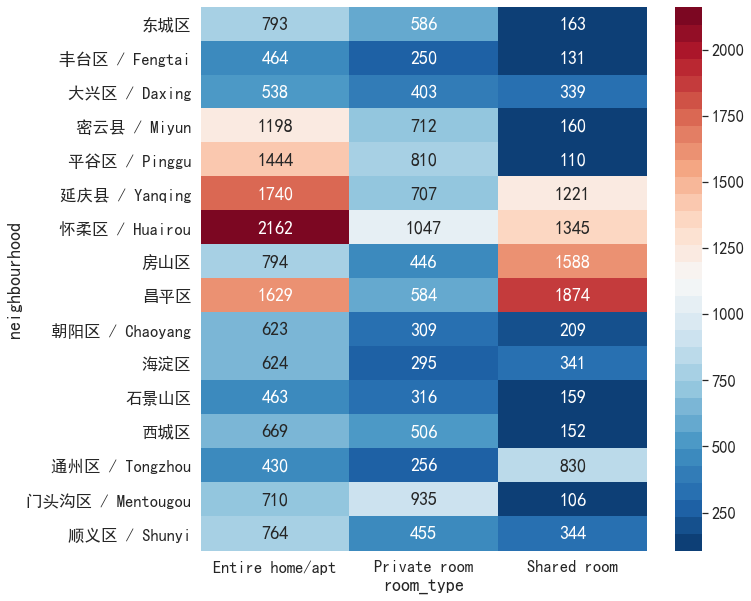

In [29]:
# Comparison of listing prices in each district, average number of reviews, district, housing type
pd.options.display.precision=2
plt.figure(figsize=(10,10))
feature_df=pd.pivot_table(df,index='neighbourhood',values=['price','number_of_reviews'],columns='room_type',aggfunc=np.mean)
sns.heatmap(feature_df.price,cmap=sns.color_palette('RdBu_r',n_colors=32),annot=True,fmt='.0f')

## Small Machine Learning Model

Before modeling, we clarify the features and annotations of the model. Our feature selection tries to ensure that the data is fully involved. The feature processing method agrees to use normalization processing. Feature selection will try to use several methods to process. In terms of model construction, start with a linear model. The annotation value is the number of comments. When selecting the number of comments, because there is no creation time of the listing, the average number of comments per month is selected as the annotation construction model.

Feature engineering: temporarily use word length for text data, house description, homeowner name, and the number of letters as the feature number, and discard samples with null values

In [34]:
def data_processing_modeling():
    
    model_df=df.drop('neighbourhood_group',axis=1)
    model_df=df.dropna(how='any',subset=['reviews_per_month','last_review'])
    model_df['name_length']=model_df.name.apply(lambda x:len(str(x).split()))
    model_df['host_name_length']=model_df.host_name.apply(lambda x:len(str(x)))
    model_df['neighbourhood_digit']=LabelEncoder().fit_transform(model_df.neighbourhood)
    model_df['room_digit']=LabelEncoder().fit_transform(model_df.room_type)
    
    feature_subsets=['name_length','host_name_length','neighbourhood_digit','room_digit','price','minimum_nights']
    label=['reviews_per_month']
    
    # normalization of features
    for i in feature_subsets:
        model_df[i]=MinMaxScaler().fit_transform(model_df[i].values.reshape(-1,1)).reshape(1,-1)[0]
    
    X=model_df[feature_subsets]
    y=model_df[label]
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25)
    
    models=[('SVM',SVR(kernel='linear')),('RFT',RandomForestRegressor(n_estimators=1000)),\
            ('adb',AdaBoostRegressor(learning_rate=0.1,n_estimators=1000)),('xgb',XGBRegressor(n_estimators=1000))]
    
    data=[(X_train,Y_train),(X_test,Y_test)]
    
    for clt in models:
        clt_name,clt_entity=clt
        clt_entity.fit(X_train,Y_train)
        for i,db in enumerate(data):
            x,Y=db
            y_pred=clt_entity.predict(x)   
            print('%s' %('training_set' if i==0 else 'test_set'),clt_name,metrics.r2_score(Y,y_pred))# Use R^2 to evaluate regression model
  

In [35]:
data_processing_modeling()

training_set SVM -0.08724523892650948
test_set SVM -0.09449952019100749
training_set RFT 0.6672884742549414
test_set RFT -0.01102115110451729
training_set adb -0.18631040591797543
test_set adb -0.15284717693041894
training_set xgb 0.6471522131696531
test_set xgb -0.11881360715191369


Random forests perform better in the training set, but the fit in the test set is poor. Unfortunately we did not get good results.